In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")

In [3]:
merged_df=df.copy()

In [4]:
merged_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
merged_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
merged_df.shape

(891, 12)

In [8]:
merged_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
merged_df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
float_merged_df=merged_df.select_dtypes(include=['float64','int64']).columns
for col in float_merged_df:
    fig = px.box(float_merged_df, y=merged_df[col])
    fig.update_layout(yaxis_title=col)
    fig.show()

## Hinding Misssing value

In [11]:
merged_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
merged_df.dropna(subset=['Embarked'],inplace=True)

In [13]:
merged_df['Age'].fillna(merged_df['Age'].median(), inplace=True)

In [14]:
merged_df.drop(columns=['Cabin'], inplace=True)  

In [15]:
merged_df.drop(columns=['PassengerId'], inplace=True)  

In [16]:
merged_df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## EDA

In [52]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


In [53]:
dfo=merged_df.select_dtypes(include=['int64','float64']).columns
for col in dfo:
    fig=px.histogram(dfo,merged_df[col],marginal="box")
    fig.update_layout(yaxis_title=col)
    fig.show()

In [54]:
merged_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [55]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [56]:
import plotly.express as px

counts = df.groupby(['Sex']).size().reset_index(name='Count')

fig = px.sunburst(counts, path=['Sex'], values="Count")

fig.show()

In [57]:

survival_counts = merged_df.groupby(['Sex', 'Survived']).size().reset_index(name='Count')

survival_counts['Survival Status'] = survival_counts['Survived'].map({0: 'Not Survived', 1: 'Survived'})


survived_df = survival_counts[survival_counts['Survived'] == 1]
not_survived_df = survival_counts[survival_counts['Survived'] == 0]

fig_survived = px.pie(survived_df, values='Count', names='Sex', title='Survived by Gender', 
                      labels={'Sex': 'Gender', 'Count': 'Number of Survivors'},
                      color_discrete_sequence=px.colors.qualitative.Set3)

fig_not_survived = px.pie(not_survived_df, values='Count', names='Sex', title='Not Survived by Gender', 
                          labels={'Sex': 'Gender', 'Count': 'Number of Non-Survivors'},
                          color_discrete_sequence=px.colors.qualitative.Set3)

fig_survived.update_layout(showlegend=True, legend_title="Gender")
fig_not_survived.update_layout(showlegend=True, legend_title="Gender")

fig_survived.show()
fig_not_survived.show()

In [58]:

# Group data by Sex and Survived to get counts
survival_counts = merged_df.groupby(['Sex', 'Survived']).size().reset_index(name='Count')

# Create a column for the survival status for better labeling
survival_counts['Status'] = survival_counts['Survived'].map({0: 'Not Survived', 1: 'Survived'})

# Create a combined label column for both sex and survival status
survival_counts['Label'] = survival_counts['Sex'] + ' - ' + survival_counts['Status']

# Create a pie chart
fig = px.pie(survival_counts, values='Count', names='Label', 
             title='Survival Distribution by Gender',
             color='Label', 
             color_discrete_map={'male - Not Survived':'#636EFA', 'male - Survived':'#EF553B', 
                                 'female - Not Survived':'#00CC96', 'female - Survived':'#AB63FA'})

# Update layout to add legend and title
fig.update_layout(showlegend=True, legend_title="Category")

# Show the pie chart
fig.show()

In [59]:
 merged_df.groupby(['Survived','Sex']).size().reset_index(name='Count')

,Survived,Sex,Count
0,0,female,81
1,0,male,468
2,1,female,231
3,1,male,109


In [25]:
#[0, 12, 18,40,65,100]
# ['Children', 'Teens', 'Adults', 'Mid Adults','Elderly'])
def cateAge(Age):
    if Age > 0 and Age<=12:
        return 'Children'
    elif Age > 12 and Age<=19:
        return 'Teens'
    elif Age > 19 and Age<=35:
        return 'Mid Adults'
    elif Age > 35 and Age<=60:
        return ' Adults'
    else :
        return 'Elderly'

 
merged_df['cateAge'] = merged_df['Age'].apply(cateAge)

In [26]:
age_group_survival_rate = merged_df.groupby('cateAge')['Survived'].mean()
age_group_counts_survived = merged_df.groupby('cateAge')['Survived'].sum()
age_group_counts_total = merged_df['cateAge'].value_counts()
# Display the survival rate and count for each age group
age_group_stats = pd.DataFrame({
    'Total Count': age_group_counts_total,
    'Survived Count': age_group_counts_survived,
    'Survival Rate': age_group_survival_rate
})
print(age_group_stats)

            Total Count  Survived Count  Survival Rate
 Adults             194              77       0.396907
Children             69              40       0.579710
Elderly              21               4       0.190476
Mid Adults          510             180       0.352941
Teens                95              39       0.410526


In [27]:
age_group_survival_rate = merged_df.groupby('cateAge')['Survived'].mean().reset_index()

# Create a bar chart using Plotly
fig = px.bar(age_group_survival_rate, x='cateAge', y='Survived',
             labels={'cateAge': 'cateAge', 'Survived': 'Survival Rate'},
             title='Survival Rate by Age Group')
fig.show()

In [28]:
merged_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cateAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mid Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Mid Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mid Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mid Adults


In [29]:
merged_df['Embarked'] = merged_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
age_group_survival_rate = merged_df.groupby('Embarked')['Survived'].mean().reset_index()

fig = px.bar(age_group_survival_rate, x='Embarked', y='Survived',
             labels={'Embarked': 'Embarked', 'Survived': 'Survival Rate'},
             title='Survival Rate by Embarked')
fig.show()

In [31]:
merged_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'cateAge'],
      dtype='object')

In [37]:
Ticket_survival_rate = merged_df.groupby('Ticket')['Survived'].mean().reset_index()
fig = px.bar(Ticket_survival_rate, x="Ticket", y="Survived", orientation='h')
fig.show()

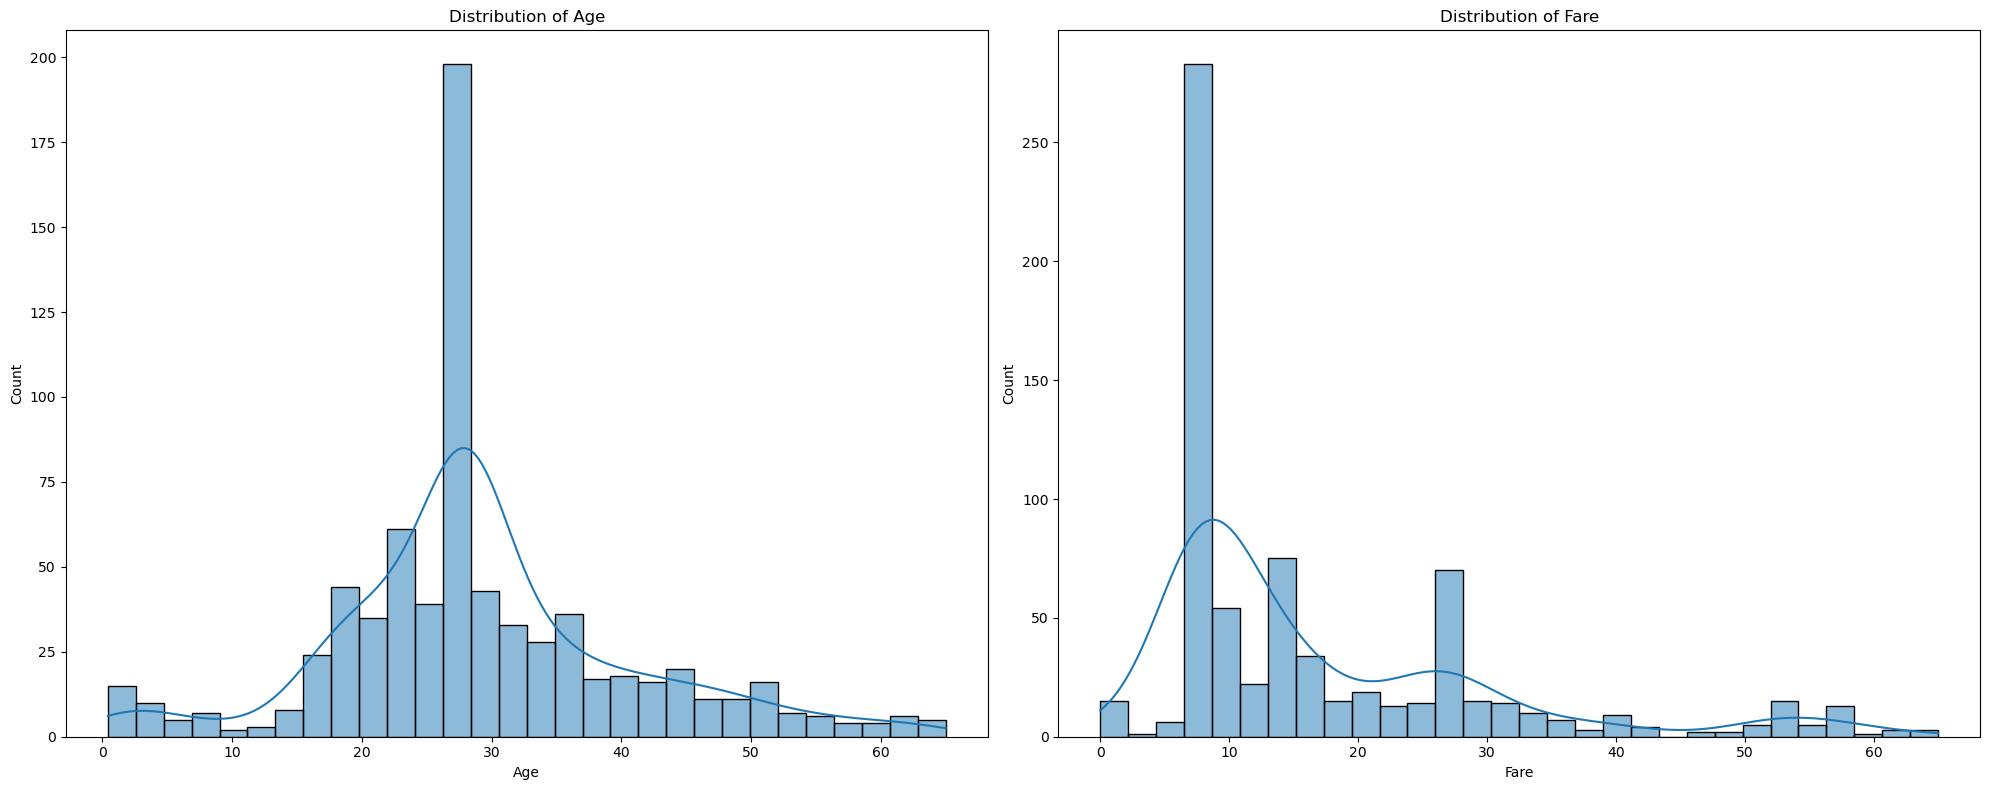

In [55]:

# Plot distributions
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Ensure axes is treated as an array
axes = axes.flatten()

sns.histplot(merged_df['Age'], bins=30, kde=True)
axes[0].set_title('Distribution of Age')

sns.histplot(merged_df['Fare'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Fare')


plt.tight_layout()
plt.show()

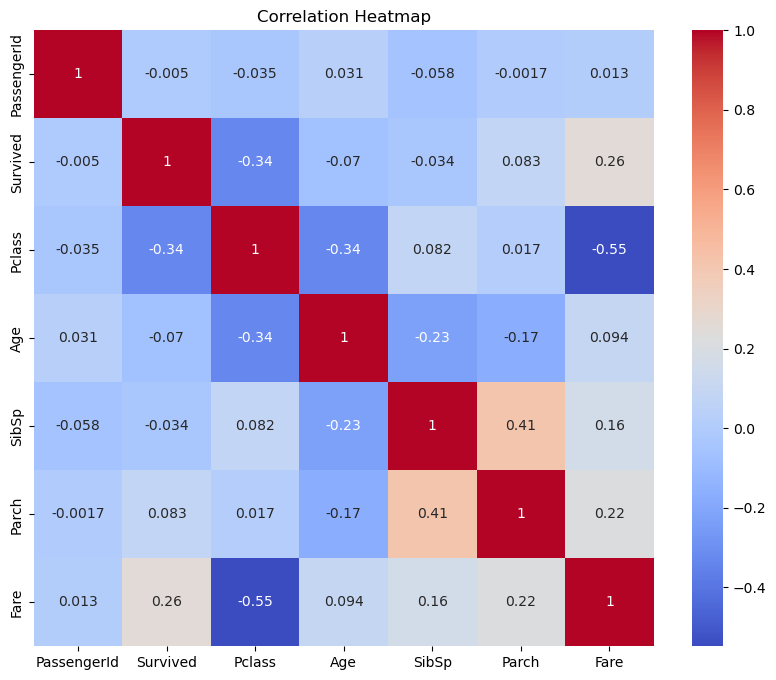

In [14]:
numeric_df = merged_df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

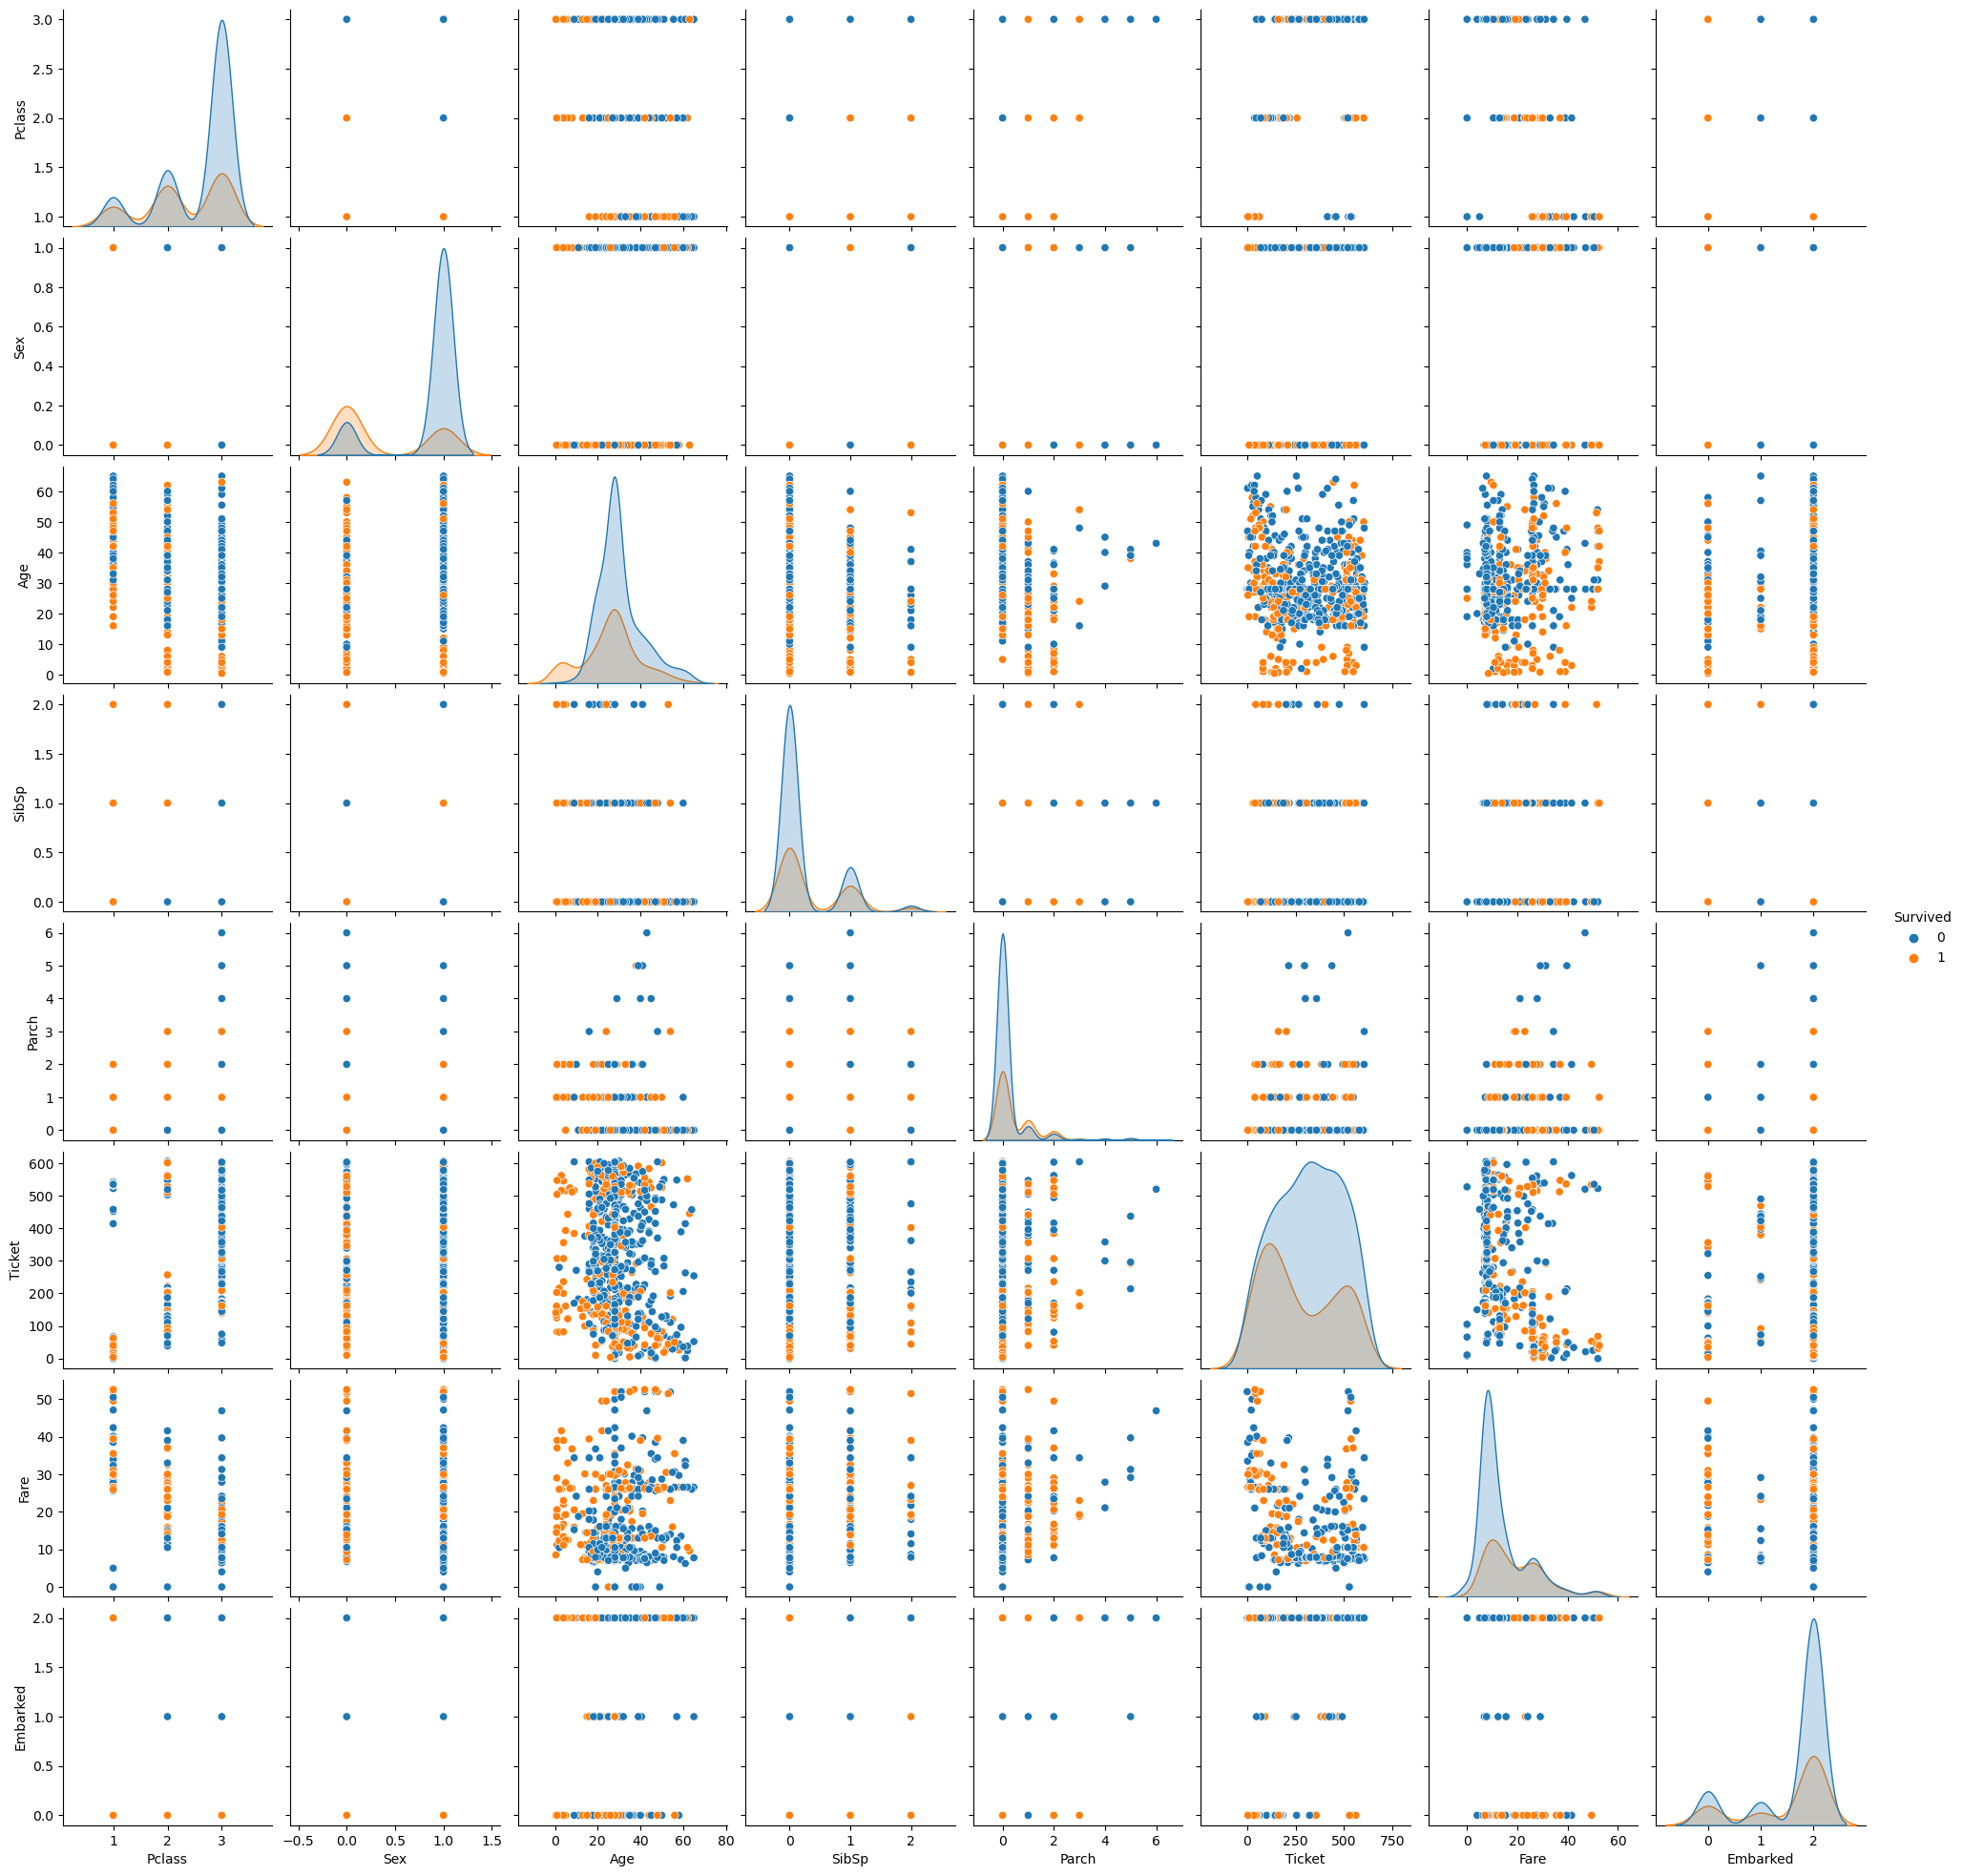

In [54]:
sns.pairplot(merged_df, hue='Survived')
plt.show()

In [17]:
merged_df= merged_df[merged_df['Fare'] <= 52.5542 ]

In [18]:
merged_df= merged_df[merged_df['Age'] <= 65 ]

In [19]:
merged_df= merged_df[merged_df['SibSp'] <= 2]

In [20]:
merged_df.drop(columns=['Name'], inplace=True)  

In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  702 non-null    int64  
 1   Pclass    702 non-null    int64  
 2   Sex       702 non-null    object 
 3   Age       702 non-null    float64
 4   SibSp     702 non-null    int64  
 5   Parch     702 non-null    int64  
 6   Ticket    702 non-null    object 
 7   Fare      702 non-null    float64
 8   Embarked  702 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 54.8+ KB


In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
categorical_columns = ['Sex', 'Ticket']
for col in categorical_columns:
    le = LabelEncoder()
    merged_df[col] = le.fit_transform(merged_df[col])
    label_encoders[col] = le

In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
categorical_columns = ['Embarked']
for col in categorical_columns:
    le = LabelEncoder()
    merged_df[col] = le.fit_transform(merged_df[col])
    label_encoders[col] = le

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(merged_df[['Age', 'Fare']])

array([[-0.60756815, -0.7628313 ],
       [-0.2613551 , -0.69976087],
       [ 0.51762427, -0.68808116],
       ...,
       [-0.08824857,  0.75085895],
       [-0.2613551 ,  1.36287569],
       [ 0.25796448, -0.71611246]])

In [25]:
merged_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  702 non-null    int64  
 1   Pclass    702 non-null    int64  
 2   Sex       702 non-null    int32  
 3   Age       702 non-null    float64
 4   SibSp     702 non-null    int64  
 5   Parch     702 non-null    int64  
 6   Ticket    702 non-null    int32  
 7   Fare      702 non-null    float64
 8   Embarked  702 non-null    int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 46.6 KB


In [27]:
x = merged_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare','Embarked']]
y = merged_df[['Survived']]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.40, random_state=101)

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(solver='liblinear')

In [30]:
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_pred, y_test)))

Accuracy 80.43%


In [32]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

degree = 2
modelp = make_pipeline(PolynomialFeatures(degree), LogisticRegression(max_iter=10000))

# Step 4: Fit the model to the training data
modelp.fit(X_train, y_train)
y_predd = modelp.predict(X_test)
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_predd, y_test)))

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy 81.85%


In [33]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)


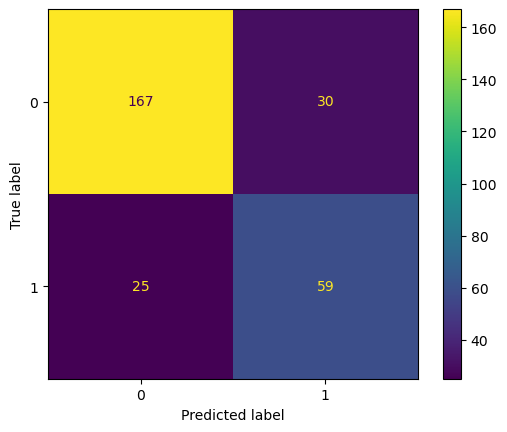

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [48]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =4, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(n_neighbors=4)

In [49]:
y_predk = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predk)
print(cm)
accuracy_score(y_test, y_predk)

[[171  26]
 [ 51  33]]


0.7259786476868327

In [50]:
from sklearn.neighbors import KNeighborsClassifier
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\USER\anaconda3\Lib\site-pac

Text(0.5, 0, 'K Value')

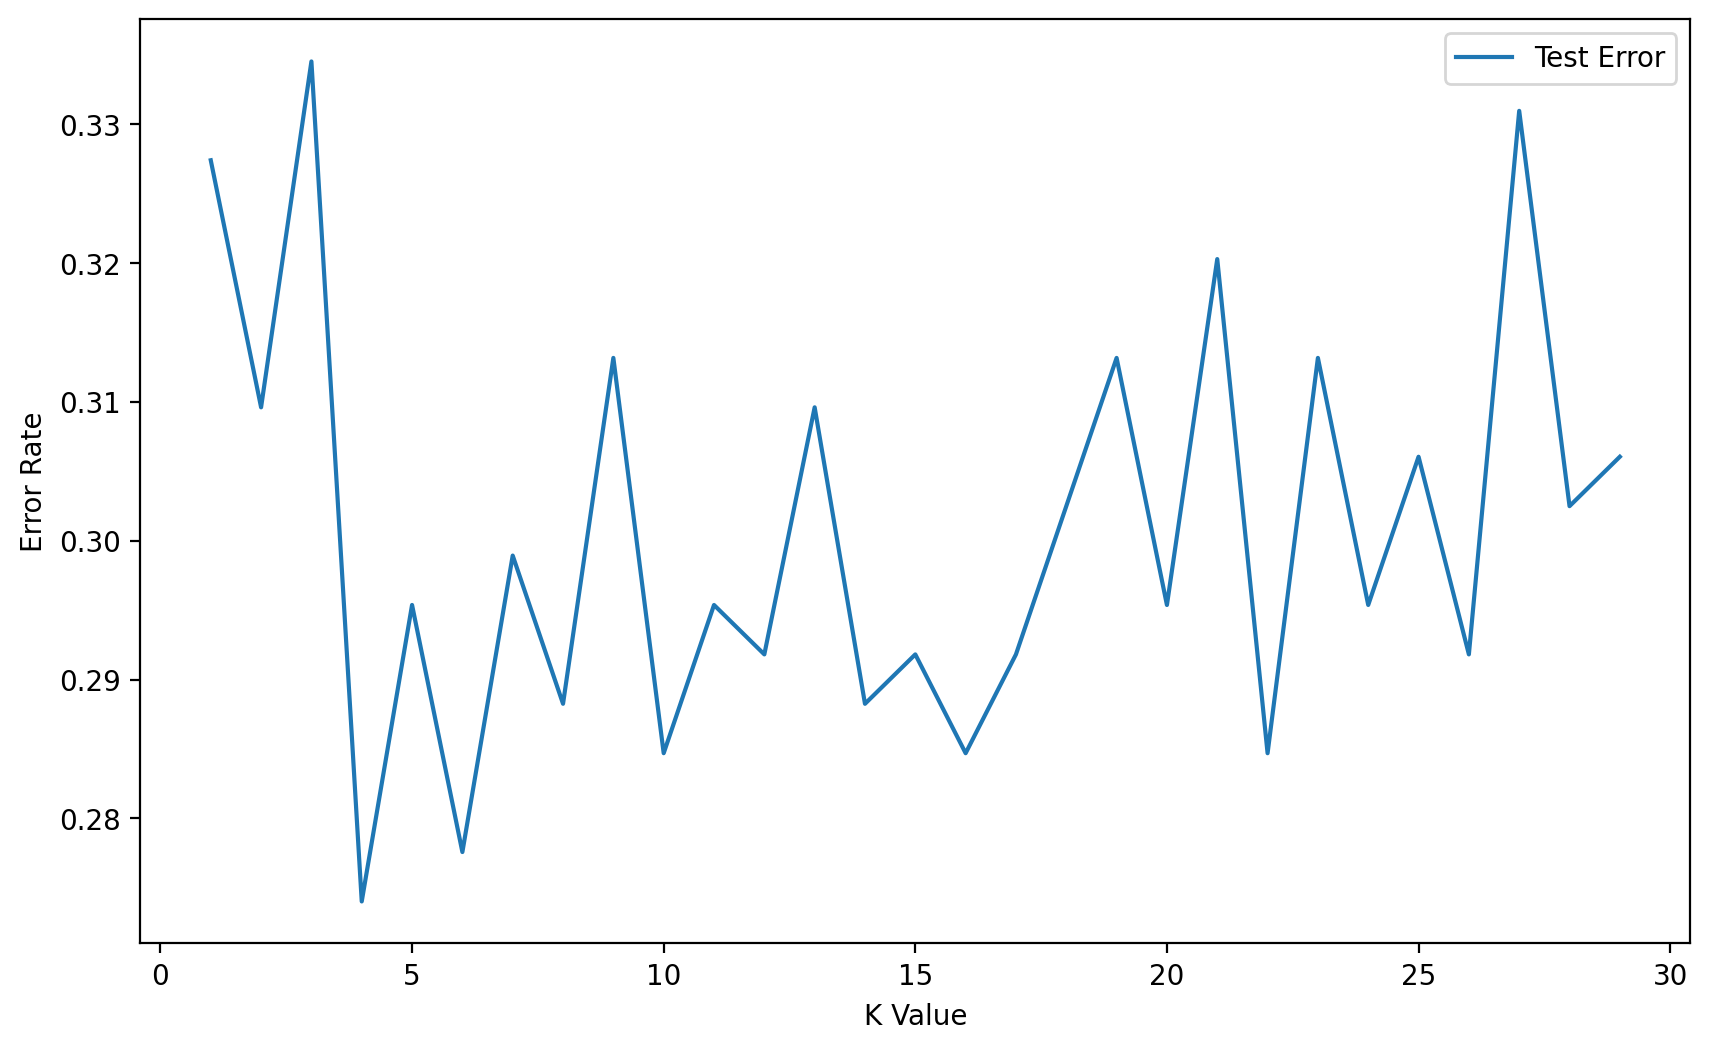

In [51]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")    

In [60]:
from sklearn.svm import SVC

# Fit (train) the Support Vector Machine classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [61]:
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_predict, y_test)))

Accuracy 79.72%


In [53]:
from sklearn.ensemble import (
    RandomForestClassifier, 
    ExtraTreesClassifier,
    VotingClassifier,
    AdaBoostClassifier, 
    GradientBoostingClassifier,
    )
random_model = RandomForestClassifier(n_estimators=80, max_depth=8, random_state=1)
random_model.fit(X_train, y_train)
y_predr = random_model.predict(X_test)

print(f"Training score {random_model.score(X_train, y_train)}")
print(f"Cross Validation {cross_val_score(random_model, X_train, y_train, cv=7,n_jobs=-1).mean()}")
acc_forest=round(cross_val_score(random_model, X_train, y_train, cv=5, n_jobs=-1).mean()* 100, 2)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training score 0.9477434679334917
Cross Validation 0.8266198282591726
